## Crop Production Analysis in India            
#####                                                    by -  Ghanshyam Saini

### Problem Statement:
The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.
This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.

### --> Importing Libraries and Dataset

# **Step 1 : Data Cleaning**

In [9]:
# Importing All Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read Csv File

crop_df = pd.read_csv('2) Crop Production data.csv')
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [13]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [15]:
crop_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [17]:
crop_df.shape

(246091, 7)

# **Step 2: Handle Missing Values**

In [20]:
crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

**There are 3,730 rows with missing values in the production column, and  the cause of these missing values is unclear, Dropping this rows from the dataset**

In [24]:
#Drop the null values fields in the dataset
new_crop_df = crop_df.dropna(subset=['Production'],axis=0)

In [26]:
new_crop_df.shape

(242361, 7)

In [28]:
new_crop_df.to_csv('Cleaned_Crop_Production.csv', index=False)

In [30]:
new_crop_df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [32]:
new_crop_df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [34]:
new_crop_df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [36]:
new_crop_df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [38]:
# Removing white spaces from categorical columns
new_crop_df['State_Name'] = new_crop_df['State_Name'].apply(lambda x : x.strip())
new_crop_df['District_Name'] = new_crop_df['District_Name'].apply(lambda x : x.strip())
new_crop_df['Season'] = new_crop_df['Season'].apply(lambda x : x.strip())
new_crop_df['Crop'] = new_crop_df['Crop'].apply(lambda x : x.strip())

In [40]:
new_crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

### Plot crop production over time

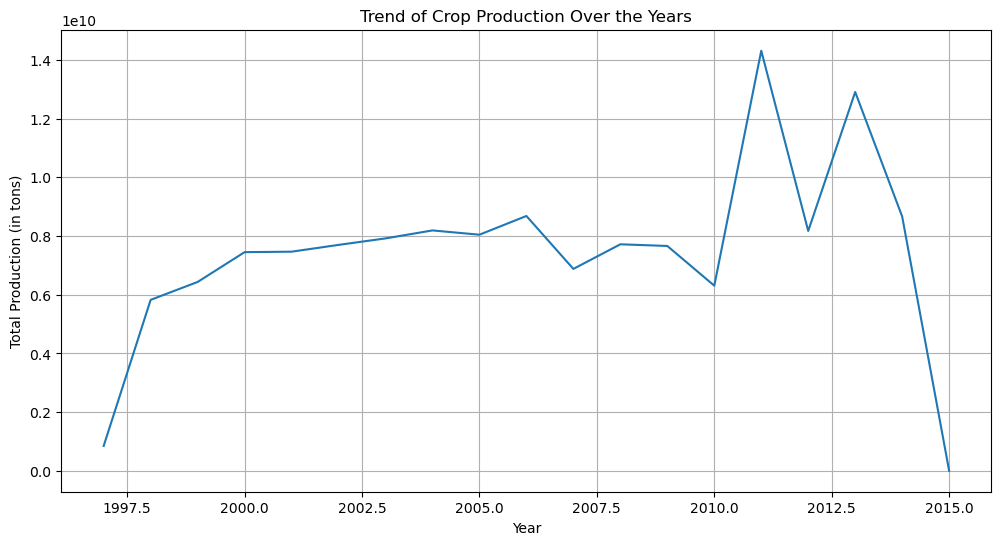

In [43]:
# Aggregate production data by year
production_by_year = new_crop_df.groupby('Crop_Year')['Production'].sum().reset_index()

# Plot total crop production over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=production_by_year, ci=None)
plt.title('Trend of Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (in tons)')
plt.grid(True)
plt.show()

### Crop production by state

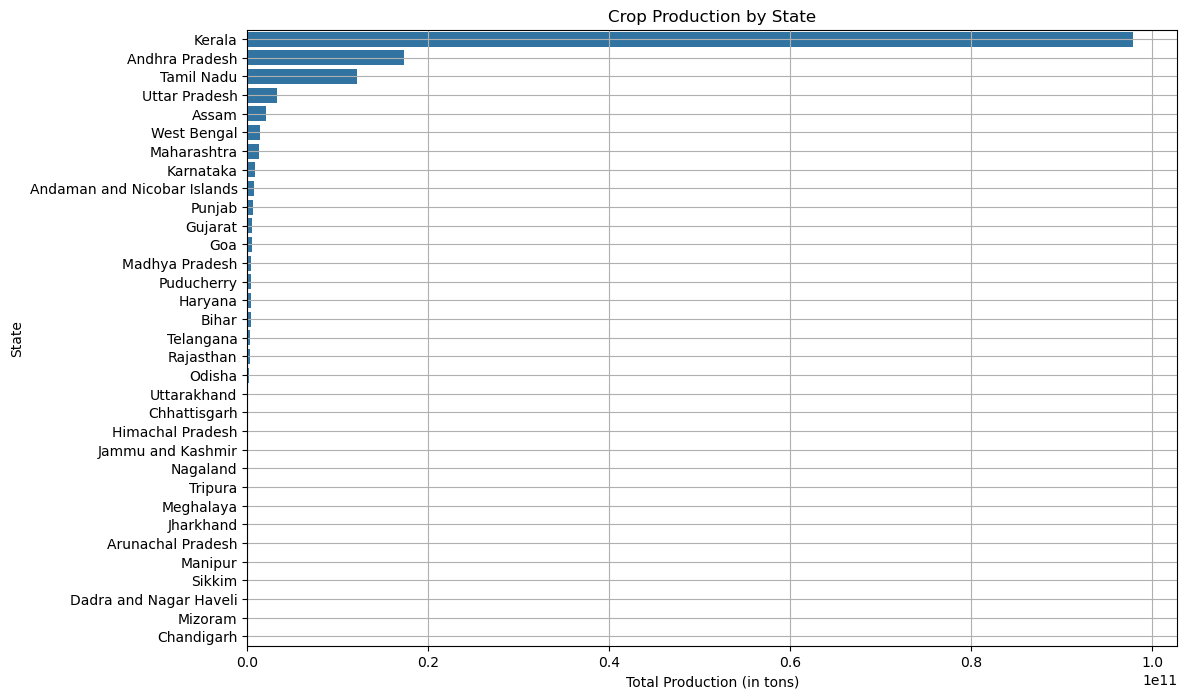

In [46]:
# Aggregate production data by state for a particular year
production_by_state = new_crop_df.groupby('State_Name')['Production'].sum().reset_index()

# Plot production by state
plt.figure(figsize=(12, 8))
sns.barplot(x='Production', y='State_Name', data=production_by_state.sort_values('Production', ascending=False))
plt.title(f'Crop Production by State')
plt.xlabel('Total Production (in tons)')
plt.ylabel('State')
plt.grid(True)
plt.show()

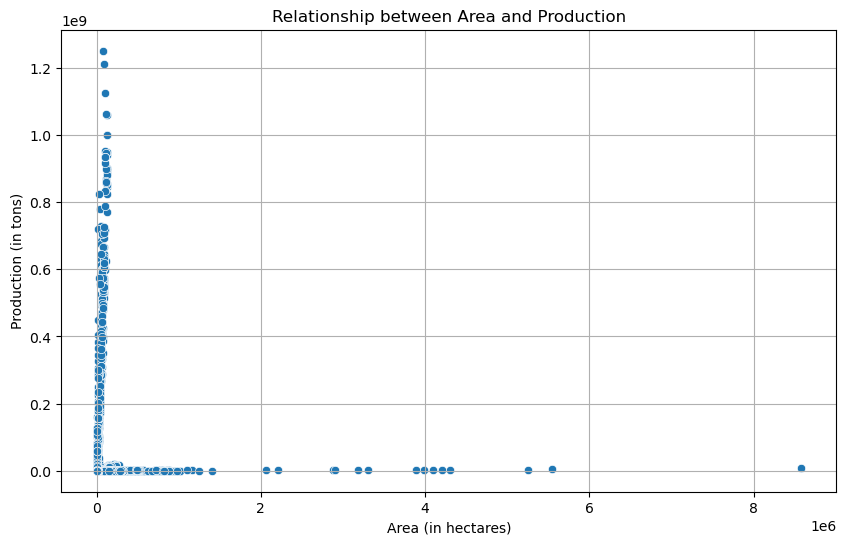

In [48]:
# Plot scatter plot to visualize relationship between Area and Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=new_crop_df)
plt.title('Relationship between Area and Production')
plt.xlabel('Area (in hectares)')
plt.ylabel('Production (in tons)')
plt.grid(True)
plt.show()

### Crop-wise production

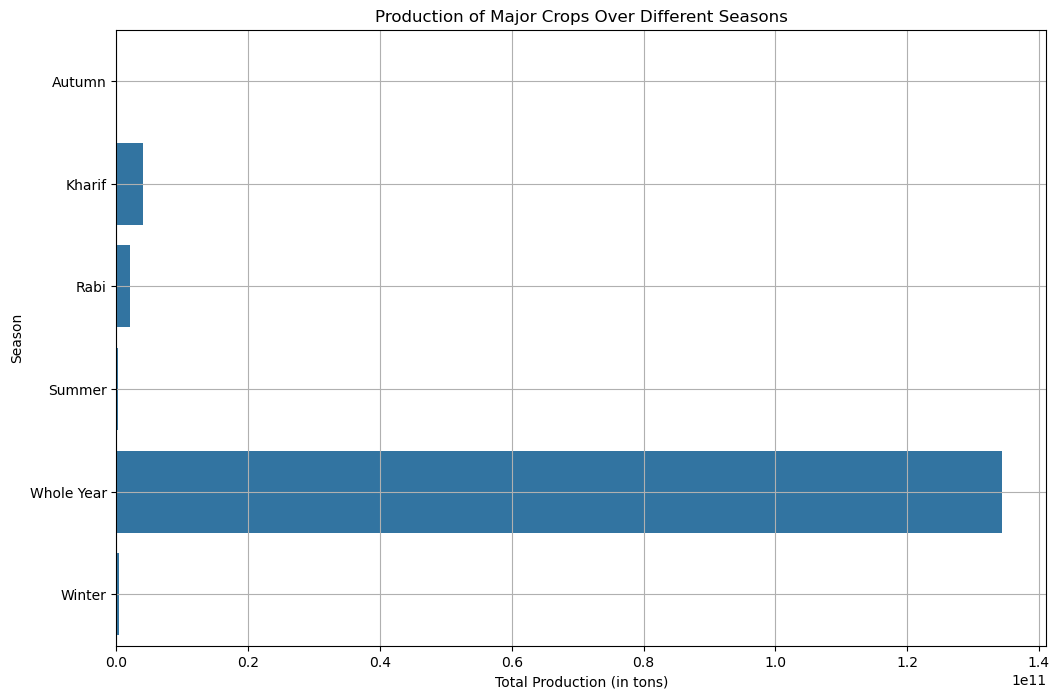

In [51]:
# Aggregate production data by crop for the most recent year (e.g., 2015)
crop_production = new_crop_df.groupby('Season')['Production'].sum().reset_index()

# Plot crop-wise production
plt.figure(figsize=(12, 8))
sns.barplot(x='Production', y='Season', data=crop_production)
plt.title('Production of Major Crops Over Different Seasons')
plt.xlabel('Total Production (in tons)')
plt.ylabel('Season')
plt.grid(True)
plt.show()